Importing Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale

Task 1 & 2 - Downloading and Loading the Dataset

In [21]:
pwd

'C:\\Users\\dhanadurga\\Desktop'

In [22]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [23]:
df.shape

(4177, 9)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   object 
dtypes: float64(7), object(2)
memory usage: 293.8+ KB


Task - 3 Visualizing the Analysis

3.1 Univariate Analysis

(array([8.350e+02, 9.990e+02, 1.027e+03, 7.470e+02, 3.630e+02, 1.470e+02,
        5.000e+01, 7.000e+00, 1.000e+00, 1.000e+00]),
 array([5.0000e-04, 7.6450e-02, 1.5240e-01, 2.2835e-01, 3.0430e-01,
        3.8025e-01, 4.5620e-01, 5.3215e-01, 6.0810e-01, 6.8405e-01,
        7.6000e-01]),
 <BarContainer object of 10 artists>)

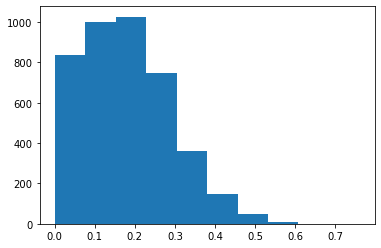

In [25]:
plt.hist(df["Viscera weight"])

3.2 Bi - Variate Analysis

<AxesSubplot:xlabel='Length', ylabel='Height'>

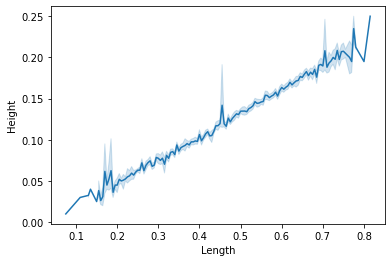

In [27]:
sns.lineplot(x=df.Length,y=df.Height)

3.3 Multi - Variate Analysis

<AxesSubplot:>

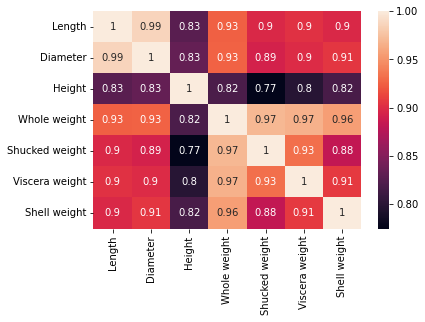

In [28]:
sns.heatmap(df.corr(),annot=True)

Task 4 - Descriptive Statistics

In [31]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


Task 5 - Handle the Missing values

In [32]:
df.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Age               False
dtype: bool

In [33]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

Task 6 - Find Outliers and Replacing

<AxesSubplot:xlabel='Length'>

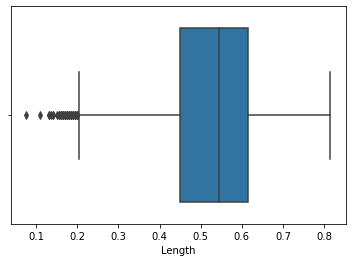

In [36]:
sns.boxplot(x=df["Length"])

<AxesSubplot:xlabel='Diameter'>

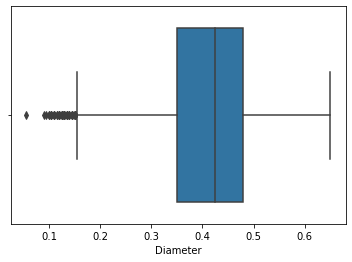

In [37]:
sns.boxplot(x=df["Diameter"])

## Performing Inter Quartile Range
q2 = df.Diameter.quartile(0.25)
q3 = df.Diameter.quartile(0.50)
IQR = q3 - q2
upper_limit = q3+1.5*IQR
lower_limit - q2-1.5*IQR

In [38]:
df.median()

C:\Users\dhanadurga\AppData\Local\Temp\ipykernel_11672\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
dtype: float64

In [40]:
q2 = df.Diameter.quantile(0.25)
q3 = df.Diameter.quantile(0.70)
IQR = q3 - q2
upper_limit = q3+1.5*IQR
lower_limit = q2-1.5*IQR

In [41]:
print(lower_limit)
print(upper_limit)
df["Diameter"].head

0.16999999999999998
0.6499999999999999


<bound method NDFrame.head of 0       0.365
1       0.265
2       0.420
3       0.365
4       0.255
        ...  
4172    0.450
4173    0.440
4174    0.475
4175    0.485
4176    0.555
Name: Diameter, Length: 4177, dtype: float64>

<AxesSubplot:xlabel='Diameter'>

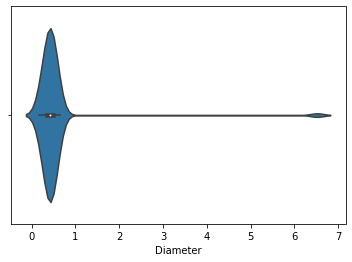

In [42]:
df["Diameter"] = np.where(df["Diameter"]<lower_limit,6.52,df["Diameter"])
sns.violinplot(x=df["Diameter"])

Task 7 - Categorical Columns and Perform Encoding


In [43]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [46]:
print(df.Height.unique())
print(df.Length.unique())
print(df.Diameter.unique())
print(df.Age.unique())

[0.095 0.09  0.135 0.125 0.08  0.15  0.14  0.11  0.145 0.1   0.13  0.085
 0.155 0.165 0.185 0.18  0.175 0.2   0.105 0.045 0.055 0.05  0.12  0.07
 0.16  0.06  0.17  0.195 0.19  0.115 0.075 0.065 0.215 0.21  0.23  0.205
 0.22  0.04  0.01  0.03  0.035 0.225 0.24  0.235 0.02  0.025 0.015 0.
 0.515 0.25  1.13 ]
[0.455 0.35  0.53  0.44  0.33  0.425 0.545 0.475 0.55  0.525 0.43  0.49
 0.535 0.47  0.5   0.355 0.365 0.45  0.38  0.565 0.615 0.56  0.58  0.59
 0.605 0.575 0.68  0.665 0.705 0.465 0.54  0.24  0.205 0.21  0.39  0.46
 0.325 0.52  0.4   0.485 0.405 0.445 0.245 0.505 0.595 0.31  0.555 0.57
 0.6   0.62  0.625 0.695 0.36  0.51  0.435 0.495 0.385 0.515 0.37  0.27
 0.375 0.7   0.71  0.265 0.305 0.345 0.65  0.28  0.175 0.17  0.635 0.645
 0.61  0.725 0.235 0.315 0.225 0.64  0.63  0.585 0.42  0.335 0.415 0.275
 0.295 0.075 0.13  0.11  0.16  0.23  0.3   0.32  0.655 0.66  0.2   0.165
 0.19  0.74  0.34  0.675 0.745 0.685 0.69  0.67  0.29  0.26  0.395 0.41
 0.22  0.255 0.735 0.155 0.48  0.195 0.25

In [49]:
le = LabelEncoder()
df.Length = le.fit_transform(df.Length)
df.Sex = le.fit_transform(df.Sex)
df.Age = le.fit_transform(df.Age)

In [50]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,66,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,45,0.265,0.090,0.2255,0.0995,0.0485,0.070,38
2,0,81,0.420,0.135,0.6770,0.2565,0.1415,0.210,6
3,2,63,0.365,0.125,0.5160,0.2155,0.1140,0.155,8
4,1,41,0.255,0.080,0.2050,0.0895,0.0395,0.055,38


Task 8 - Split the Data into Dependant and Independant Variables

In [62]:
y = df["Sex"]
x = df.drop("Sex",axis=1)

In [63]:
y

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32

In [64]:
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,66,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,45,0.265,0.090,0.2255,0.0995,0.0485,0.0700,38
2,81,0.420,0.135,0.6770,0.2565,0.1415,0.2100,6
3,63,0.365,0.125,0.5160,0.2155,0.1140,0.1550,8
4,41,0.255,0.080,0.2050,0.0895,0.0395,0.0550,38
...,...,...,...,...,...,...,...,...
4172,88,0.450,0.165,0.8870,0.3700,0.2390,0.2490,10
4173,93,0.440,0.135,0.9660,0.4390,0.2145,0.2605,8
4174,95,0.475,0.205,1.1760,0.5255,0.2875,0.3080,6
4175,100,0.485,0.150,1.0945,0.5310,0.2610,0.2960,8


Task 9 - Scale the Independent Variables

In [67]:
scaled_x = pd.DataFrame(scale(x),columns=x.columns)
scaled_x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,-0.575145,-0.190539,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,-0.320358
1,-1.450298,-0.316351,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,1.369020
2,0.049965,-0.121343,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.981418
3,-0.700167,-0.190539,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,-0.834516
4,-1.616994,-0.328932,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,1.369020
...,...,...,...,...,...,...,...,...
4172,0.341683,-0.083600,0.609334,0.118813,0.047908,0.532900,0.073062,-0.687614
4173,0.550053,-0.096181,-0.107991,0.279929,0.358808,0.309362,0.155685,-0.834516
4174,0.633401,-0.052147,1.565767,0.708212,0.748559,0.975413,0.496955,-0.981418
4175,0.841770,-0.039566,0.250672,0.541998,0.773341,0.733627,0.410739,-0.834516


Task 10 - Split the Data into Training and Testing

In [68]:
xtrain, xtest, ytrain, ytest = train_test_split(scaled_x, y, test_size=0.3, random_state=0)

In [69]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(2923, 8) (1254, 8) (2923,) (1254,)


In [70]:
xtrain

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
1376,0.800097,-0.008113,0.848442,0.923373,0.955826,0.528338,1.086094,-0.834516
1225,-1.491972,-0.328932,-1.303532,-1.281263,-1.146128,-1.310147,-1.356680,1.222118
2722,-1.241928,-0.303770,-1.064424,-1.222119,-1.191186,-1.150477,-1.241726,1.369020
3387,0.174987,-0.133924,0.131117,0.090261,-0.251727,0.140568,0.511324,-0.100004
2773,0.466705,-0.064728,0.131117,0.321738,0.498488,0.318486,0.080246,-0.687614
...,...,...,...,...,...,...,...,...
1033,1.050140,0.010759,1.087551,1.617803,1.374865,1.294753,1.711157,-0.834516
3264,1.091814,-0.020694,0.011563,0.696995,0.816146,1.249133,0.331708,-0.614162
1653,0.591727,-0.083600,0.131117,0.265653,0.466947,0.236370,0.105392,-0.834516
2607,0.841770,-0.033275,0.609334,0.608279,0.530028,0.510090,0.572393,-0.981418


In [71]:
ytrain

1376    2
1225    1
2722    1
3387    2
2773    0
       ..
1033    2
3264    0
1653    2
2607    0
2732    1
Name: Sex, Length: 2923, dtype: int32

In [72]:
xtest

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
668,0.216661,-0.115052,0.370226,0.181016,-0.368878,0.569396,0.690940,-0.540711
1580,-0.200079,-0.146505,-0.466653,-0.433875,-0.443224,-0.343004,-0.325685,1.442471
3784,0.800097,-0.045856,0.370226,0.870348,0.755318,1.764639,0.565209,-0.687614
463,-2.533822,7.553151,-2.020857,-1.579022,-1.522362,-1.538247,-1.572219,1.222118
2615,1.008466,-0.020694,0.848442,1.390405,1.415417,1.778325,0.996287,-0.614162
...,...,...,...,...,...,...,...,...
1052,2.008642,0.105117,1.924430,3.004623,2.918100,2.996378,2.742152,-0.614162
3439,-0.700167,-0.209411,-0.347099,-0.760186,-0.673019,-0.776394,-0.774725,1.442471
1174,0.925118,-0.026985,-2.977291,0.668443,0.685478,1.162455,0.356854,-0.981418
2210,1.133488,-0.014403,1.446213,1.635138,0.572833,1.062091,2.666713,-0.100004


In [73]:
ytest

668     2
1580    1
3784    2
463     1
2615    2
       ..
1052    2
3439    1
1174    0
2210    2
2408    1
Name: Sex, Length: 1254, dtype: int32